# Importing Libraries

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
df = pd.read_csv('Cyclistic.csv',low_memory=False)

In [3]:
df.head()

,ride_id,rideable_type,start_time,end_time,start_station_name,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,B1B5FB38739FBD7B,docked_bike,2021-06-13 16:29:55,2021-06-13 17:39:31,Lake Shore Dr & Diversey Pkwy,Lake Shore Dr & Diversey Pkwy,TA1309000039,41.932588,-87.636427,41.932588,-87.636427,casual
1,0A005D2F89E8FAEF,docked_bike,2021-11-07 14:24:15,2021-11-07 14:44:58,Aberdeen St & Monroe St,Blue Island Ave & 18th St,13135,41.880419,-87.655519,41.857556,-87.661535,casual
2,DEED405E369DC554,docked_bike,2021-09-05 10:06:04,2021-09-05 10:09:25,State St & Kinzie St,State St & Kinzie St,13050,41.889187,-87.627754,41.889187,-87.627754,casual
3,1ED57CA08E45D3F3,docked_bike,2021-05-02 14:31:34,2021-05-02 15:25:31,Field Museum,Field Museum,13029,41.865312,-87.617867,41.865312,-87.617867,casual
4,34DA78407D27793C,docked_bike,2021-08-15 12:02:46,2021-08-15 13:44:05,Michigan Ave & 14th St,Michigan Ave & 14th St,TA1307000124,41.864059,-87.623727,41.864059,-87.623727,casual


# Data Cleaning

## DataTypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   start_time          object 
 3   end_time            object 
 4   start_station_name  object 
 5   end_station_name    object 
 6   end_station_id      object 
 7   start_lat           float64
 8   start_lng           float64
 9   end_lat             float64
 10  end_lng             float64
 11  member_casual       object 
dtypes: float64(4), object(8)
memory usage: 512.2+ MB


We need to change the datatypes for these features to their according datatypes.

In [5]:
df['ride_id'] = df['ride_id'].astype('object')
df['rideable_type'] = df['rideable_type'].astype('category')
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_station_name'] = df['start_station_name'].astype('category')
df['end_station_name'] = df['end_station_name'].astype('category')
df['end_station_id'] = df['end_station_id'].astype('object') 
df['start_lat'] = df['start_lat'].astype('float64')
df['start_lng'] = df['start_lng'].astype('float64')
df['end_lat'] = df['end_lat'].astype('float64')
df['end_lng'] = df['end_lng'].astype('float64')
df['member_casual'] = df['member_casual'].astype('category')

In [6]:
df.dtypes

ride_id                       object
rideable_type               category
start_time            datetime64[ns]
end_time              datetime64[ns]
start_station_name          category
end_station_name            category
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual               category
dtype: object

## Null Values

### Finding percentage of null values per feature

In [7]:
round(df.isnull().sum()/len(df)*100,2)

ride_id                0.00
rideable_type          0.00
start_time             0.00
end_time               0.00
start_station_name    12.35
end_station_name      13.21
end_station_id        13.21
start_lat              0.00
start_lng              0.00
end_lat                0.09
end_lng                0.09
member_casual          0.00
dtype: float64

In [8]:
df.dropna(inplace = True)

In [9]:
df.shape

(4588302, 12)

### Remove Duplicates

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(4588302, 12)

This dataset contains no duplicate rows

# Feature Engineering

Feature engineering is a critical step in the data preprocessing phase of machine learning and data science projects. It involves creating new features from existing data to improve the performance of machine learning models and aids in further analysis.

###  Features

In [12]:
# Distance Feature Function
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(math.radians(lat1)) * \
        math.cos(math.radians(lat2)) * math.sin(dLon/2) * math.sin(dLon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = R * c
    return distance

# Time of Day Feature Function
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Season Feature Function
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

In [13]:
# Duration feature
df['duration_minutes'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60

# Day of week feature
df['day_of_week'] = df['start_time'].dt.day_name()

# Time of day feature
df['time_of_day'] = df['start_time'].dt.hour.apply(get_time_of_day)

# Month feature
df['month'] = df['start_time'].dt.month
df['season'] = df['month'].apply(get_season)

#  Distance Feature 
df['distance_km'] = df.apply(
    lambda row: haversine_distance(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']), axis=1
)

### Remove Unused Columns

In [14]:
cols_remove = ['start_lat','start_lng','end_lat','end_lng','start_station_name', 'end_station_name', 'end_station_id']
df.drop(columns = cols_remove,inplace= True)

In [15]:
df.columns

Index(['ride_id', 'rideable_type', 'start_time', 'end_time', 'member_casual',
       'duration_minutes', 'day_of_week', 'time_of_day', 'month', 'season',
       'distance_km'],
      dtype='object')

## Removing outliers

In [16]:
# Using 1.5*IQR Method
Q1_duration = df['duration_minutes'].quantile(0.25)
Q3_duration = df['duration_minutes'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration

Q1_distance = df['distance_km'].quantile(0.25)
Q3_distance = df['distance_km'].quantile(0.75)
IQR_distance = Q3_distance - Q1_distance

lower_bound_duration = Q1_duration - 1.5 * IQR_duration
upper_bound_duration = Q3_duration + 1.5 * IQR_duration

lower_bound_distance = Q1_distance - 1.5 * IQR_distance
upper_bound_distance = Q3_distance + 1.5 * IQR_distance

df = df[(df['duration_minutes'] >= lower_bound_duration) & 
                     (df['duration_minutes'] <= upper_bound_duration) &
                     (df['distance_km'] >= lower_bound_distance) & 
                     (df['distance_km'] <= upper_bound_distance)]


## Remove Negative Values

In [17]:
#Check to see if negative values exist in the feature by finding minimum value
print(df['duration_minutes'].unique().min())
print(df['distance_km'].unique().min())

-7.05
0.0


In [18]:
df = df[df['duration_minutes'] > 0]

# Data Exploration

In [19]:
df.head()

,ride_id,rideable_type,start_time,end_time,member_casual,duration_minutes,day_of_week,time_of_day,month,season,distance_km
1,0A005D2F89E8FAEF,docked_bike,2021-11-07 14:24:15,2021-11-07 14:44:58,casual,20.716667,Sunday,Afternoon,11,Fall,2.590595
2,DEED405E369DC554,docked_bike,2021-09-05 10:06:04,2021-09-05 10:09:25,casual,3.350000,Sunday,Morning,9,Fall,0.000000
6,70C632336029DEFC,docked_bike,2021-03-28 17:32:20,2021-03-28 17:46:50,casual,14.500000,Sunday,Evening,3,Spring,1.494597
8,F78959999A1A4877,docked_bike,2021-05-16 17:33:17,2021-05-16 17:41:04,casual,7.783333,Sunday,Evening,5,Spring,1.011226
12,346AF575A281267B,docked_bike,2021-05-30 14:15:24,2021-05-30 14:26:35,casual,11.183333,Sunday,Afternoon,5,Spring,0.534562


In [20]:
round(df['rideable_type'].value_counts()/len(df)*100,2)

classic_bike     72.26
electric_bike    22.64
docked_bike       5.09
Name: rideable_type, dtype: float64

Customers use the service with this distribution: 
classic bike 72% ,electric bike 23%, and docked bike 5%

In [21]:
df['member_casual'].value_counts(1)*100

member    58.673174
casual    41.326826
Name: member_casual, dtype: float64

58% of the service is used by members while 41% are casual users.

In [22]:
df[['duration_minutes','distance_km']].describe().applymap(lambda x: f"{x:0.3f}")

,duration_minutes,distance_km
count,4061558.000,4061558.000
mean,13.158,1.854
std,9.046,1.271
min,0.017,0.000
25%,6.433,0.916
50%,10.817,1.576
75%,17.650,2.573
max,44.867,5.680


**Observation:**

The average user rides the bike for 13 minutes and 1.85 km.

The std for duration is 9.04 suggesting that while the average is around 13 minutes, there are quite a few shorter and longer durations.

The minimum duration_minutes is 0.017 minutes. Suggesting error in data entry.

The minimum distance_km is 0.00, which could indicate trips that were started and ended at the same location, or again, potential data issues.

In [23]:
df.groupby('rideable_type')[['duration_minutes','distance_km']].mean()

,duration_minutes,distance_km
rideable_type,,
classic_bike,13.133169,1.813186
docked_bike,21.236802,1.789175
electric_bike,11.418500,1.997412


Docked bikes are used for longer durations, suggesting they are used in scenarios where bikes are rented for longer periods, possibly for leisure or errands (not going from point A to B directly).

Electric bikes, despite being used for the shortest durations, cover the longest distances on average, potentially used for fast commutes. 

Classic bikes are used for moderate durations and distances, which could indicate they are chosen for routine or regular trips where the benefits of electric assist are not required


In [24]:
df.groupby('member_casual')[['duration_minutes','distance_km']].mean()

,duration_minutes,distance_km
member_casual,,
casual,15.962839,1.922356
member,11.181961,1.805301


Casual users tend to use the service for longer durations than members while the distance traveled by casual users is only marginally greater than that of members, which might suggest that they are could potentially use the service for more leisurely activities.

In [25]:
df.groupby('member_casual').count()

,ride_id,rideable_type,start_time,end_time,duration_minutes,day_of_week,time_of_day,month,season,distance_km
member_casual,,,,,,,,,,
casual,1678513,1678513,1678513,1678513,1678513,1678513,1678513,1678513,1678513,1678513
member,2383045,2383045,2383045,2383045,2383045,2383045,2383045,2383045,2383045,2383045


For members, the service appears to be a routine part of their daily travel, likely integrated into their regular commute such as going back and forth from work. Casual users, seem to use the service more sporadically or for leisure (tourists).

# Univariate Data

## Distribution Plot

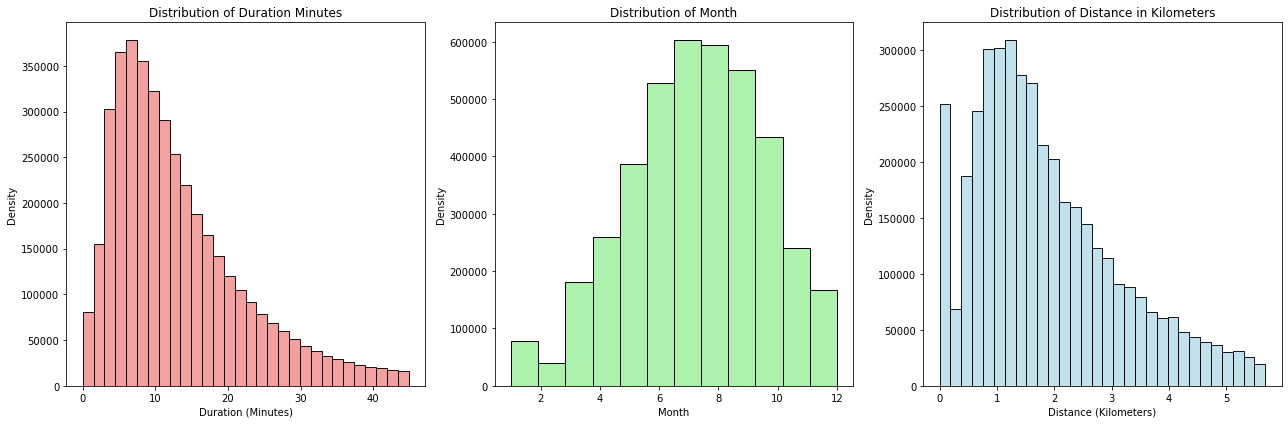

In [26]:
plt.figure(figsize=(18, 6))

# Distribution for Duration 
plt.subplot(1, 3, 1)
sns.histplot(df['duration_minutes'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Duration Minutes')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Density')

# Distribution for Month
plt.subplot(1, 3, 2)
sns.histplot(df['month'], bins=12, color='lightgreen', kde=False, edgecolor='black') 
plt.title('Distribution of Month')
plt.xlabel('Month')
plt.ylabel('Density')

# Distribution for Distance
plt.subplot(1, 3, 3)
sns.histplot(df['distance_km'], bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution of Distance in Kilometers')
plt.xlabel('Distance (Kilometers)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

**Distribution of Duration Minutes:**

1. The histogram is skewed to the right, indicating that most rides are of shorter duration, with a significant drop-off as duration increases.

2. The highest frequency of rides occurs in the bin representing durations of just a few minutes, suggesting that short rides are the most common.

3. There is a long tail extending to the right, meaning there are fewer rides as the duration increases, but some rides still last up to 40 minutes or more.

**Distribution of Month:**

1. This histogram suggests that there exists a seasonal trends in bike usage.

2. The highest peaks are in the months corresponding to mid-year,  indicating summer or warmer months when bike usage is higher.


**Distribution of Distance in Kilometers:**

1. The histogram is right-skewed, showing that shorter distances are far more common than longer ones.

2. There is a clear peak at the lower end of the distance range, decreasing steadily as the distance increases.

3. The frequency becomes very low for distances beyond 5 kilometers, suggesting that users typically do not use the service for long-distance rides.

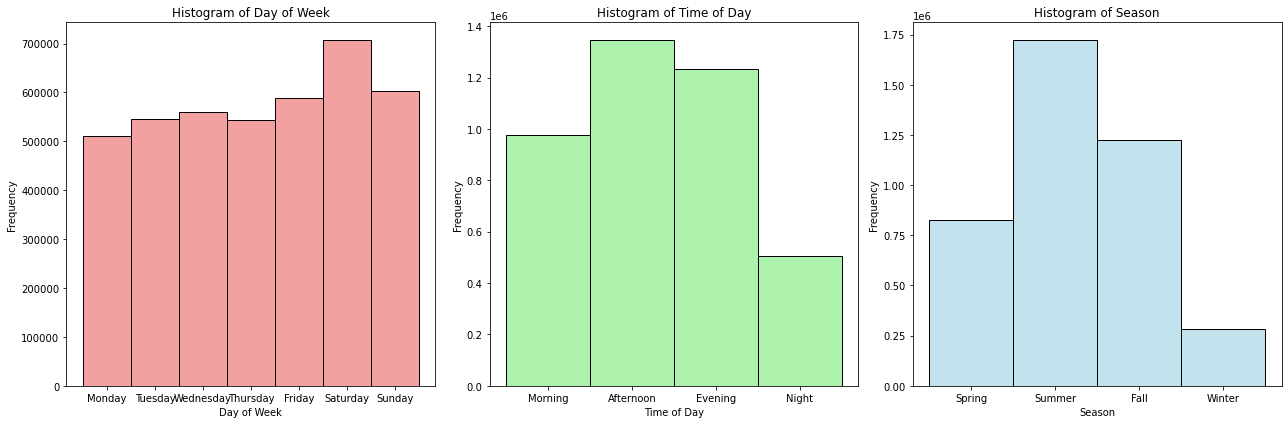

In [27]:
plt.figure(figsize=(18, 6))

# Order for X axis
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)

# Histogram for Day of Week
plt.subplot(1, 3, 1)
sns.histplot(df['day_of_week'], bins=7, color='lightcoral', edgecolor='black') 
plt.title('Histogram of Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

# Order for X axis
time_order = ['Morning','Afternoon','Evening','Night']
df['time_of_day'] = pd.Categorical(df['time_of_day'], categories=time_order, ordered=True)

# Histogram for Time of Day
plt.subplot(1, 3, 2)
sns.histplot(df['time_of_day'], bins=24, color='lightgreen', edgecolor='black')  
plt.title('Histogram of Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Frequency')

# Order for X axis
season_order = ['Spring','Summer','Fall','Winter']
df['season'] = pd.Categorical(df['season'], categories=season_order, ordered=True)

# Histogram for Season
plt.subplot(1, 3, 3)
sns.histplot(df['season'], color='lightblue', edgecolor='black') 
plt.title('Histogram of Season')
plt.xlabel('Season')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

**Histogram of Day of Week:**

1. The activity peaks on Saturday, indicating it's the most popular day
2. There's a consistent pattern from Monday to Friday, with a slight increase on Friday.

**Histogram of Time of Day:**

1. The morning is the least popular time for the activity, followed by a substantial increase in the afternoon.
2. Afternoon shows the highest frequency
3. The night time has a lowest frequency

**Histogram of Season:**

1. The summer season has the highest frequency of activity, which then decreases as we move into fall.
2. Winter has the lowest frequency.

# Bivariate Analysis

## Count Plot

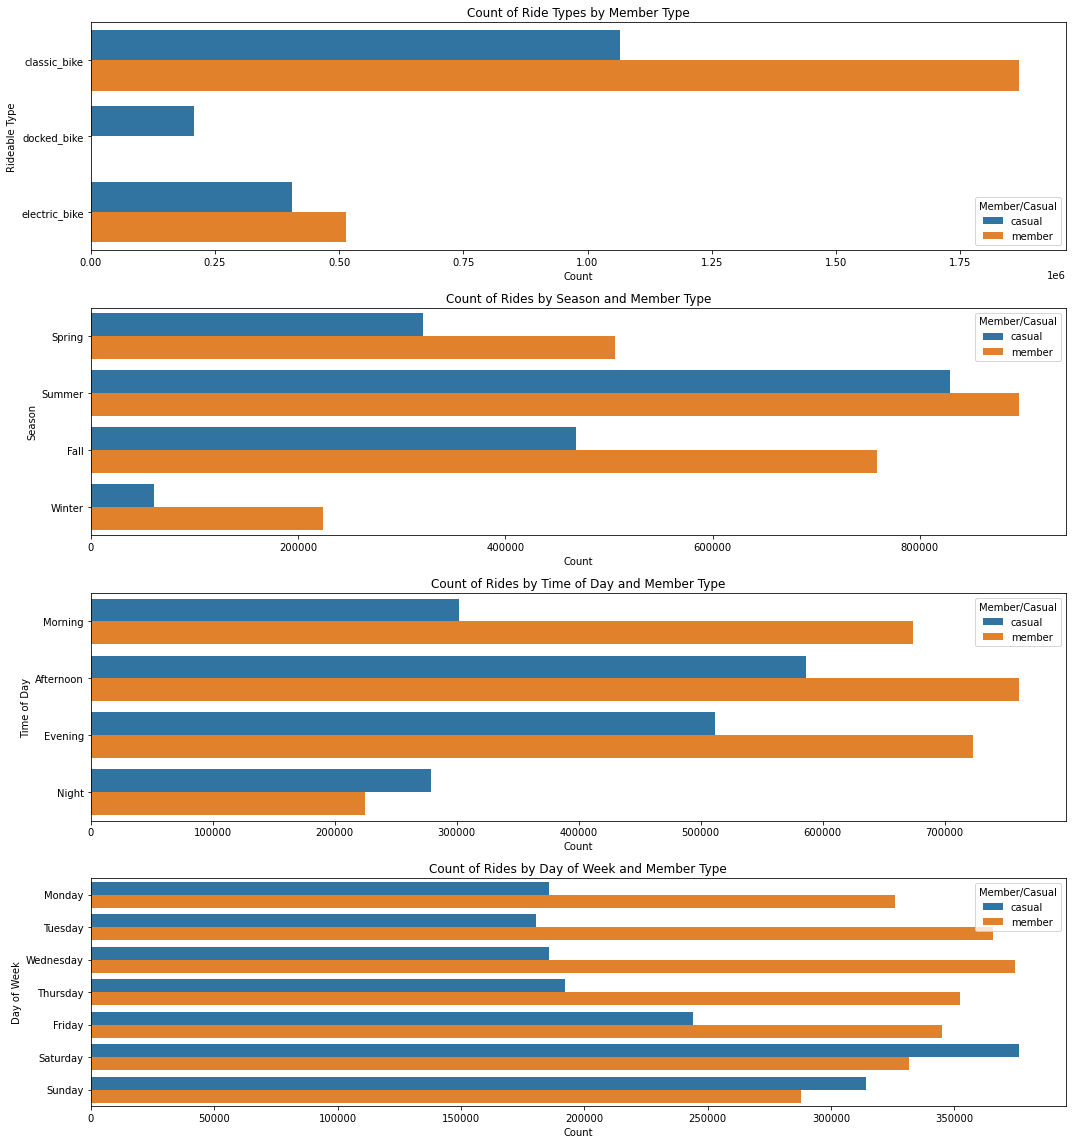

In [28]:
plt.figure(figsize=(15, 16))  

# Countplot for rideable_type
plt.subplot(4, 1, 1)  
sns.countplot(y='rideable_type', hue='member_casual', data=df)
plt.title('Count of Ride Types by Member Type')
plt.xlabel('Count')
plt.ylabel('Rideable Type')
plt.legend(title='Member/Casual')

# Countplot for season
plt.subplot(4, 1, 2)  
sns.countplot(y='season', hue='member_casual', data=df)
plt.title('Count of Rides by Season and Member Type')
plt.xlabel('Count')
plt.ylabel('Season')
plt.legend(title='Member/Casual')

# Countplot for time_of_day
plt.subplot(4, 1, 3)  
sns.countplot(y='time_of_day', hue='member_casual', data=df)
plt.title('Count of Rides by Time of Day and Member Type')
plt.xlabel('Count')
plt.ylabel('Time of Day')
plt.legend(title='Member/Casual')

# Countplot for day_of_week
plt.subplot(4, 1, 4) 
sns.countplot(y='day_of_week', hue='member_casual', data=df)
plt.title('Count of Rides by Day of Week and Member Type')
plt.xlabel('Count')
plt.ylabel('Day of Week')
plt.legend(title='Member/Casual')

plt.tight_layout()
plt.show()

**Ride Type by Member:**

1. Classic Bikes: Members use classic bikes more than casual users do.

2. Docked Bikes: Docked bikes are used significantly less than the other types and no members use the docked_bike

3. Electric Bikes: Electric bikes are predominantly used by casual users.

**Season by Member:**

1. Member usage appears to be more consistent across seasons compared to casual usage, which shows more variability.

2. The number of rides is highest for both user types in the Summer, with member usage slightly surpassing casual usage.

3. The ratio between Casual and Members closes during Summer and is biggest during Winter

**Time of Day:**

1. Afternoon is when the service is most used

2. During the night there are more casual riders than members

**Day of Week:**

1. There are more casual riders than member riders on the weekend.

## Density Plot

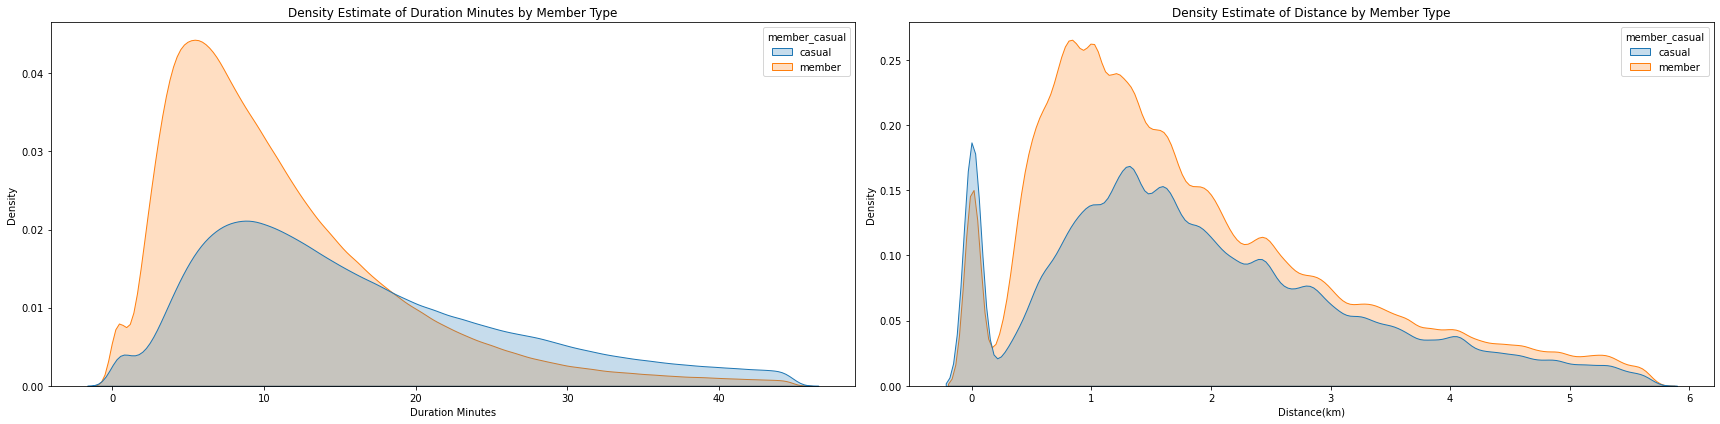

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(24, 6))  

# KDE plot for Duration
sns.kdeplot(data=df, x='duration_minutes', hue='member_casual', fill=True, ax=axes[0])
axes[0].set_title('Density Estimate of Duration Minutes by Member Type')
axes[0].set_xlabel('Duration Minutes')
axes[0].set_ylabel('Density')

# KDE plot for Distance
sns.kdeplot(data=df, x='distance_km', hue='member_casual', fill=True, ax=axes[1])
axes[1].set_title('Density Estimate of Distance by Member Type')
axes[1].set_xlabel('Distance(km)')
axes[1].set_ylabel('Density')


plt.tight_layout()
plt.show()

**Duration vs Member Type:**


1. Member has a peak that is much higher than casuals, indicating that members in general, use the service for a shorter amount of time

2. Casual's distribution is wider and more shallow

**Distance vs Member Type:**

1. Both categories have  bimodal distributions. Could indicate the existence of two different subpopulations within each category.



## Box Plot

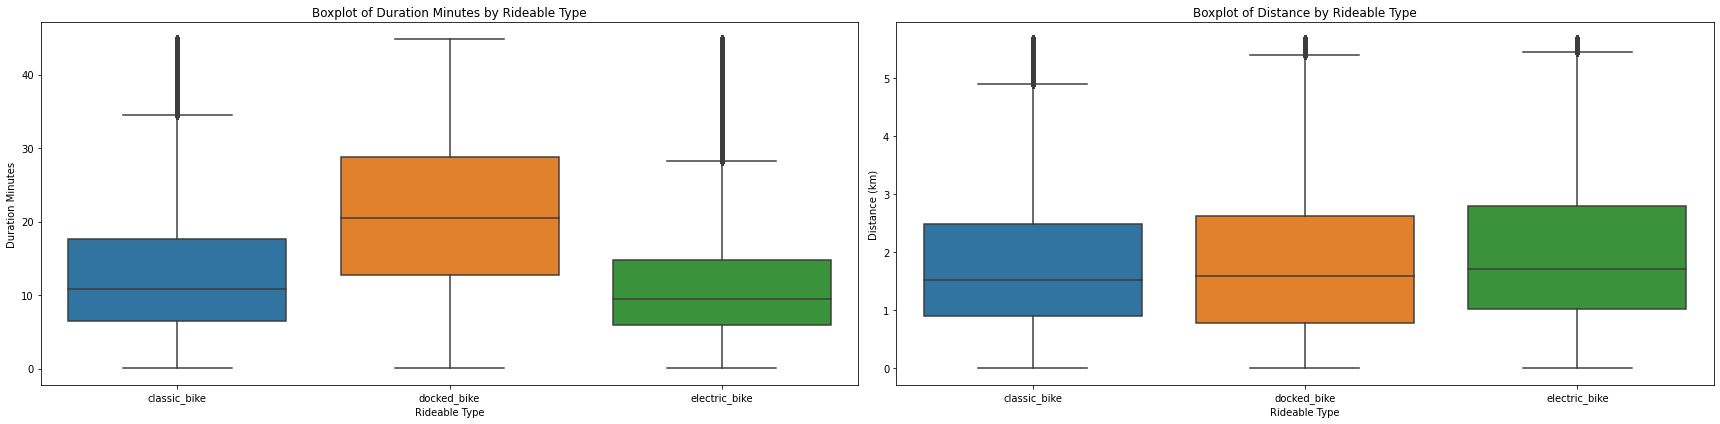

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(24, 6)) 

# Boxplot for duration by rideable_type 
sns.boxplot(data=df, x='rideable_type', y='duration_minutes', ax=axes[0])
axes[0].set_title('Boxplot of Duration Minutes by Rideable Type')
axes[0].set_xlabel('Rideable Type')
axes[0].set_ylabel('Duration Minutes')

# Boxplot for distance by rideable_type
sns.boxplot(data=df, x='rideable_type', y='distance_km', ax=axes[1])
axes[1].set_title('Boxplot of Distance by Rideable Type')
axes[1].set_xlabel('Rideable Type')
axes[1].set_ylabel('Distance (km)')

plt.tight_layout()
plt.show()

**Boxplot of Duration Minutes by Rideable Type:**


The classic bike has the lowest median duration, while the electric bike has the highest median duration.
The docked bike shows a  higher variability in duration minutes compared to the other types judging from the box size.

Whiskers extend to the furthest points that are considered not to be outliers. Points beyond the whiskers are typically considered outliers and are often plotted as individual points, although there are none visible in this plot.

**Boxplot of Distance by Rideable Type:**

The median distance traveled is quite close for all rideable types, but the electric bike shows a slightly higher median than the other types.

The docked bike shows a wider range compared to the classic and electric bikes.
The IQR for the classic bike is the narrowest, showing that the distances traveled on classic bikes are more consistent compared to the other types.

# Machine Learning/Classification

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### Creating a copy of dataframe for machine learning

In [32]:
data_ML = df.copy(deep=True)
data_ML['start_time'] = data_ML['start_time'].dt.hour
data_ML = data_ML.drop(columns = ['ride_id','end_time'])

### One Hot Encoding

In [33]:
categorical_columns = ['rideable_type', 'day_of_week', 'time_of_day', 'season']
data_ML = pd.get_dummies(data_ML, columns=categorical_columns)

In [34]:
data_ML['member_casual'] = data_ML['member_casual'].astype('category').cat.codes

In [35]:
data_ML.head()

,start_time,member_casual,duration_minutes,month,distance_km,rideable_type_classic_bike,rideable_type_docked_bike,rideable_type_electric_bike,day_of_week_Monday,day_of_week_Tuesday,...,day_of_week_Saturday,day_of_week_Sunday,time_of_day_Morning,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Night,season_Spring,season_Summer,season_Fall,season_Winter
1,14,0,20.716667,11,2.590595,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,10,0,3.350000,9,0.000000,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
6,17,0,14.500000,3,1.494597,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
8,17,0,7.783333,5,1.011226,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
12,14,0,11.183333,5,0.534562,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0


## Feature Selection

Why perform feature selection?

**Model Complexity:** More features can make the model more complex, which might **lead to overfitting** if not managed correctly with regularization or cross-validation.

**Performance Increase:** If the increase in performance from adding more features is substantial and justifiable for the problem at hand, then it makes sense to include them.

**Diminishing Returns:** It's important to assess whether the magnitude of the improvement is significant enough compared to the complexity added. If the gain is marginal, it might not be worth the additional complexity and time to run the algorithm.

**Interpretability:** A model with fewer features might be easier to interpret and explain.



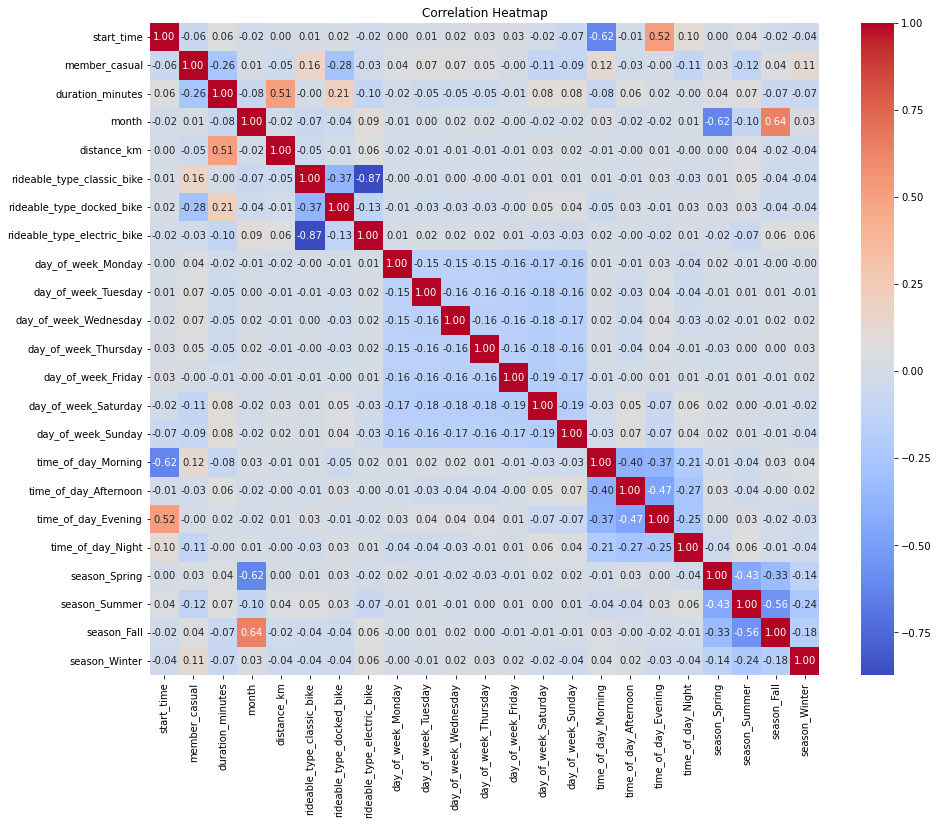

In [36]:
# Plotting a correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(data_ML.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# EXPLAIN CORRELATION MATRIX  AND HOW TO INTERPRET

Correlation heatmap helps to identify which features might be more or less useful based on their relationships with other features or the target variable. The goal is to select features that are predictive of the outcome without being redundant.

**Target Variable Correlation**: Look for features that have a strong correlation with the target variable (member_casual). Strong correlation indicates that as the feature changes, the target variable changes with it.

**Multicollinearity**: Avoid features that have a very high positive or negative correlation with each other (close to 1 or -1, respectively). For example, rideable_type_classic_bike and rideable_type_electric_bike have a strong negative correlation (-0.87), indicating that they are inversely related and one could be omitted from the model.

**Redundant Features**: If two features are highly correlated, they are likely providing similar information to the model. For example, day_of_week_Saturday and day_of_week_Sunday both have a strong correlation with time_of_day_Morning, which could suggest that mornings on weekends have a distinct pattern, but including both day indicators may not add much more information than just one of them.

**Weak Correlations**: Features that have very low correlation with other features or the target variable (close to 0) are not useful for the model.

In [37]:
y=data_ML['member_casual']
X = data_ML.drop(columns = 'member_casual')
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42,stratify=y)

In [38]:
#feature_names = data_ML.drop(columns = 'member_casual').tolist()
feature_names = data_ML.columns.tolist()
feature_names.remove('member_casual')

In [39]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

feature_names = data_ML.columns.tolist()
feature_names.remove('member_casual')

# Extracting feature importances
feature_importances = clf.feature_importances_

# Creating a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df.sort_values(by='Importance', ascending=False,inplace = True)

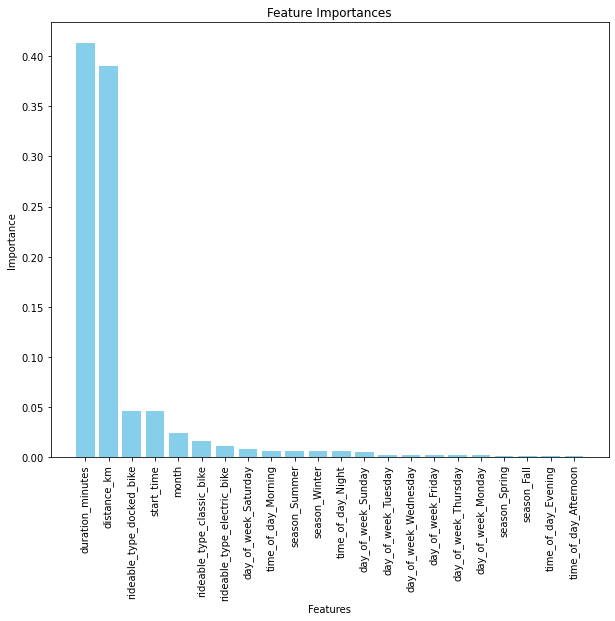

In [40]:
plt.figure(figsize=(10, 8))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation='vertical')
plt.show()

Mean Decrease in Impurity (MDI): 

Random Forest is a collection of decision trees, and each tree is constructed by selecting features that best split the data to increase purity within the nodes. Purity meaning the likeliness of the labels in a node within a tree. For example, if the ratio between 2 classes in a node is 1:1, the node is impure. However, if there is just one class in the node, then the node is pure.

The importance of a feature is calculated based on how much the feature decreases the weighted impurity in a tree. The more a feature decreases the impurity, the more important it is considered to be. 

The height of each bar in the plot corresponds to this averaged decrease in impurity. So, a taller bar indicates that the feature consistently reduces impurity more than other features when it is used to split the data within the trees, implying it is a more important predictor variable for the outcome variable.

In [41]:
feature_importance_df.head(5)

,Feature,Importance
1,duration_minutes,0.413065
3,distance_km,0.390479
5,rideable_type_docked_bike,0.045967
0,start_time,0.045784
2,month,0.024285


In [42]:
#cumulative explained importance threshold = .90
features =  ['duration_minutes','distance_km','rideable_type_docked_bike','start_time','month']

Cumulative explained importance threshold is a concept used to determine how many features are needed to explain a certain percentage of the model's predictive power or variance. By choosing .9 I am choosing features that explains 90% of the data.

## Scaling


In [43]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['duration_minutes', 'distance_km']

scaler = StandardScaler()
data_ML[columns_to_scale] = scaler.fit_transform(data_ML[columns_to_scale])

## Classification

In [44]:
y=data_ML['member_casual']
X = data_ML[features]
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X,y, test_size=0.2, random_state=42,stratify=y)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Initialize and Train
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_clf.fit(X_train_imp, y_train_imp) 

# Predict and evaluate 
y_pred = xgb_clf.predict(X_test_imp) 
accuracy = accuracy_score(y_test_imp, y_pred)
rounded_accuracy = round(accuracy * 100, 2)
print(f'Accuracy: {rounded_accuracy}%')

Accuracy: 69.29%


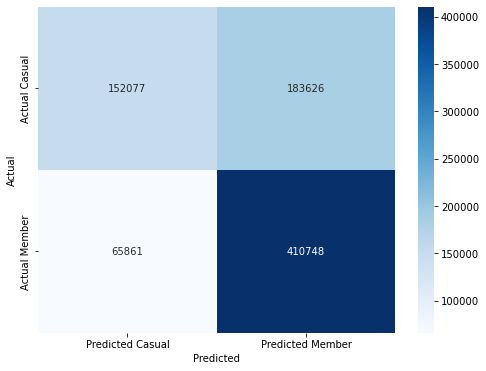

In [46]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Casual', 'Predicted Member'], yticklabels=['Actual Casual', 'Actual Member'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Accuracy**: The number of correct predictions made by the model out of all predictions. (TP + TN) / (TP + FP + FN + TN), or **69.28%**

**Precision**: It is a measure of a classifier's exactness. For the positive Members, it's TP / (TP + FP), or **69.11%**.

**Recall (True Positive Rate)**: It is a measure of a classifier's completeness. For the positive Members, it's TP / (TP + FN), which equals **86.18%**.

**F1 Score**: It is an overall measure of a classifier's accuracy that takes both false positives and false negatives into account. The F1 score can be calculated by (2 x Precision x Recall)/(Precision+Recall), or **76.70%**.


This confusion matrix indicates that the model has a relatively high number of both false positives and false negatives, meaning that the model may not be accurate. In predictive modeling for conversion rates, a high number of false positives might be less concerning than a high number of false negatives.

# Model Prediction

In [47]:
input_data = {
    'duration_minutes' : [5],
    'distance_km' : [2],
    'rideable_type_docked_bike' : [0],
    'start_time' : [12],
    'month' : [8]
}

input_df = pd.DataFrame(input_data)
input_df[columns_to_scale] = scaler.transform(input_df[columns_to_scale])
probabilities = xgb_clf.predict_proba(input_df)

print(f"Probability of being CASUAL: {round(probabilities[0][0] * 100, 2)}%")
print(f"Probability of being MEMBER: {round(probabilities[0][1] * 100, 2)}%")

Probability of being CASUAL: 28.79%
Probability of being MEMBER: 71.21%


# Solutions

### 1. How do annual members and casual riders use Cyclistic bikes differently?

**Duration of Rides:** The density plot of duration minutes shows that casual riders tend to have longer rides compared to annual members, whose rides are more concentrated in shorter durations. This suggests that casual riders may be using bikes for leisure or exploration, while members might be using them for more routine and shorter commutes such as going to work.

**Ride Frequency by Month:** The distribution of rides by month shows a peak in warmer months, with high usage in the summer and low usage in the winter. Both user groups follow this trend, but the drop in casual ridership during colder months is more pronounced than for members. This could imply that annual members are more likely to continue riding, regardless of the season, due to the commitment of a membership and the routine nature of their rides.

**Distance of Rides:** The distribution of distance shows that casual riders often take longer trips compared to members. Aligning with the idea that casual riders may be taking bikes for recreational purposes, which normally involve longer distances.

**Time of Day and Day of Week:** Casual riders show a higher frequency of rides during weekends, especially on Saturdays, whereas member rides are more evenly distributed throughout the week. Suggesting that members are using the bikes consistently, while casual riders prefer using them during their leisure time on weekends.


**Overall, these differences indicate that annual members are likely to use the bikes more for practical, routine purposes, and they exhibit more consistent riding behavior regardless of the season or day of the week. Casual riders, on the other hand, seem to use the bikes more for leisure and are influenced more by weather and free time during the weekends.**

### 2. Why would casual riders buy Cyclistic annual memberships?

**Cost Savings:** The density plots displaying longer ride durations and distances for casual riders suggest they could be incurring higher per-trip costs. An annual membership could offer better value for money, especially for those casual riders who use the service frequently enough to benefit from the unlimited ride potential of a membership.

**Convenience for Recurring Trips:** The usage patterns depicted by the time of day and day of the week indicate that casual riders do use bikes regularly at certain times, such as weekends. An annual membership could simplify the process of getting a bike during these high-demand times.

**Incentivizing Regular Exercise:** Casual riders who use the bikes for longer distances, as indicated by the distance distribution, might be motivated by health and fitness goals. An annual membership could encourage them to integrate cycling into their regular fitness routine.

**Avoiding Seasonal Restrictions:** Since casual ridership drops in colder months, an annual membership could encourage riders to continue using the service throughout the year by mitigating the per-ride cost concerns associated with less frequent winter use.

### 3. How can Cyclistic use digital media to influence casual riders to become members?

**Highlight Cost Savings:** Create digital ad campaigns focusing on the cost-benefit of switching to an annual membership. Utilizing the data showing longer ride durations and distances for casual riders to illustrate potential savings.

**Seasonal Promotions:** Utilize social media to push seasonal offers, especially during peak usage months as shown in the usage by month histogram. Offer sign-up discounts for memberships leading up to and during these months.

**Ride Habit Encouragement:** Use the data showing frequent weekend use by casual riders to encourage them to make cycling a part of their regular routine. Promote a “Weekend Warrior” membership campaign that shows the transition from casual to committed rider.

**Weather-Related Promotions:** Since casual ridership dips in colder months, create a campaign that encourages riding during all seasons, possibly offering off-season membership discounts.

# Project Improvements & What's Next

To improve the accuracy of the predictive model, a more refinement approach to feature engineering is needed. This involves diving into more intricate behavioral patterns of users. For instance by :

1. Analyzing the frequency of use of service would provide better distinction between casuals and members as members utilize the service more frequently. 
2. Tracking the routes or stations most frequently utilized can reveal patterns in user movement and preferences. 
4. Tracking users' responses to marketing campaigns or promotions, such as engagement with marketing emails, offer redemptions, or participation in promotional events, can indicate how receptive they are to becoming paying customers.